# 36103 Statistical Thinking for Data Science  

### AT2C

## Load packages

In [3]:
# Import relevant packages

import pandas as pd
import numpy as np

# Import visualisation tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Load dataset

In [4]:
# Load the dataset
df = pd.read_csv('heart_2020_cleaned.csv')

Inspect the dataset

In [5]:
# Display the first five rows of the dataset
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
# Display the last five rows of the dataset
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [7]:
# Get the dimensionality of the DataFrame.
df.shape

(319795, 18)

In [8]:
# Get information about the DataFrame including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [9]:
# Create a copy of the dataset
df_inspect = df.copy()

## Check data quality

In [10]:
# Check dataframe for missing values
df_inspect.isnull()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319791,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319792,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319793,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# Checking for negative values in numerical columns
negative_values = df_inspect.select_dtypes(include=['float64']).lt(0).sum()

negative_values

BMI               0
PhysicalHealth    0
MentalHealth      0
SleepTime         0
dtype: int64

In [12]:
# Check for duplicates

duplicateRows = df_inspect[df_inspect.duplicated()]
duplicateRows

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,White,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,White,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,No,25.06,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,7.0,No,No,No
319689,No,27.44,No,No,No,0.0,0.0,No,Female,30-34,Hispanic,No,Yes,Very good,6.0,No,No,No
319726,No,30.41,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,7.0,No,No,No
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,Yes,Excellent,6.0,No,No,No


## Categorical variables

In [13]:
# Get descriptive statistics of categorical variables
df_inspect.describe(include = ['object'])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [14]:
# Define the categorical_variables list
categorical_variables = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
                         'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
                         'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Print unique values for each categorical variable
for feature in categorical_variables:
    print(f'Unique values of {feature}:')
    print(df_inspect[feature].unique())
    print('\n')

Unique values of HeartDisease:
['No' 'Yes']


Unique values of Smoking:
['Yes' 'No']


Unique values of AlcoholDrinking:
['No' 'Yes']


Unique values of Stroke:
['No' 'Yes']


Unique values of DiffWalking:
['No' 'Yes']


Unique values of Sex:
['Female' 'Male']


Unique values of AgeCategory:
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']


Unique values of Race:
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']


Unique values of Diabetic:
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']


Unique values of PhysicalActivity:
['Yes' 'No']


Unique values of GenHealth:
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']


Unique values of Asthma:
['Yes' 'No']


Unique values of KidneyDisease:
['No' 'Yes']


Unique values of SkinCancer:
['Yes' 'No']




Text(0.5, 1.0, 'Distribution of Heart Disease')

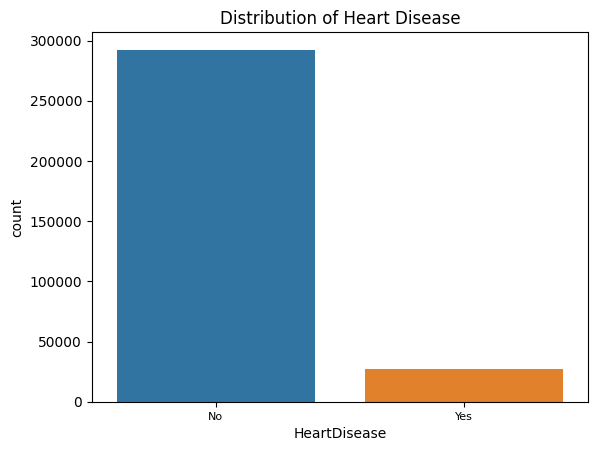

In [15]:
sns.countplot(x = df_inspect['HeartDisease'], data = df_inspect)
plt.xticks(fontsize=8)
plt.title('Distribution of Heart Disease')

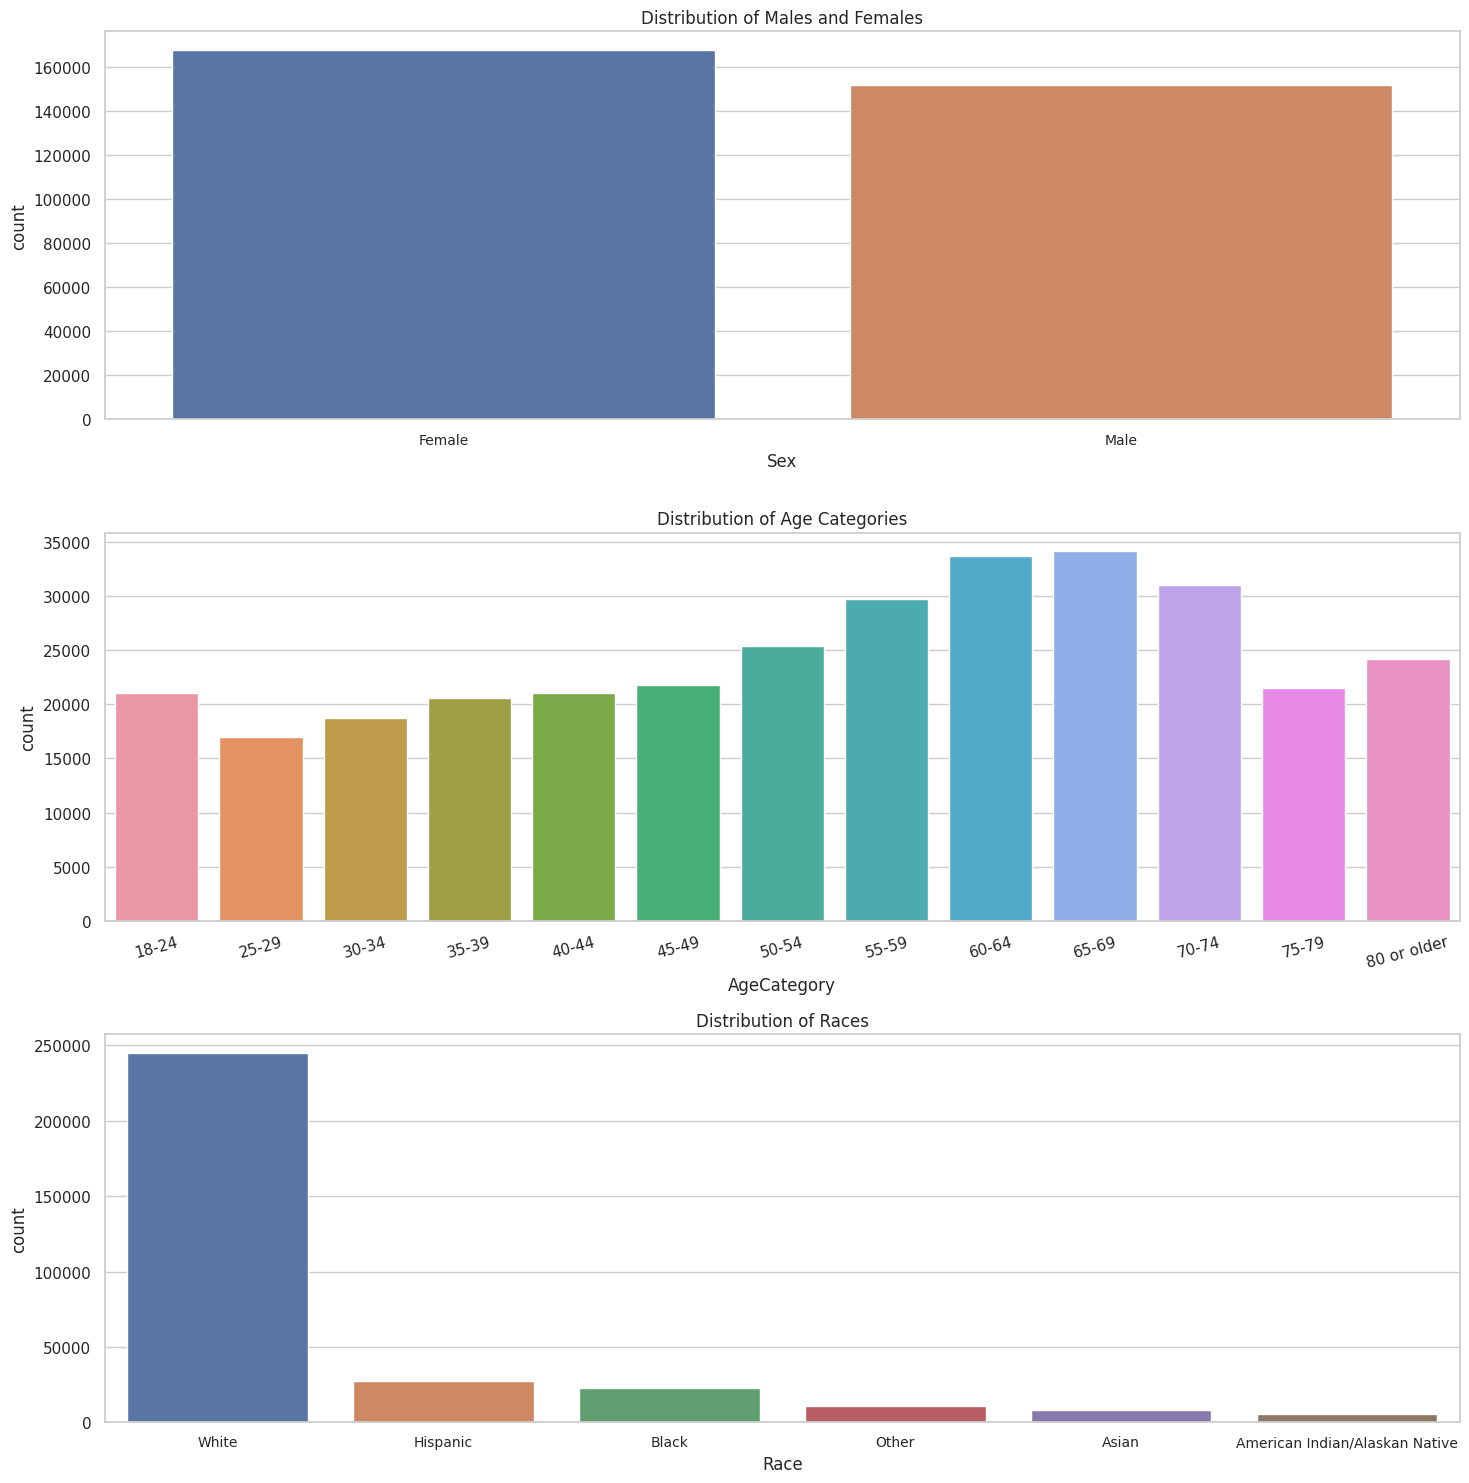

In [16]:
# Inspect non-modifiable heart risk factors: sex, age and race

sns.set(style='whitegrid')
plt.figure(figsize=(15, 15))  # Adjust the figure size

# Sex
plt.subplot(3, 1, 1)
sns.countplot(x=df_inspect['Sex'], data=df_inspect)
plt.xticks(fontsize=10)
plt.title('Distribution of Males and Females')

# AgeCategory
# Display the age categories in ascending order
ordered_ages = sorted(df_inspect['AgeCategory'].unique())

plt.subplot(3, 1, 2)
sns.countplot(x=df_inspect['AgeCategory'], data=df_inspect, order=ordered_ages)
plt.xticks(rotation=15)
plt.title('Distribution of Age Categories')

# Race
# Get the order of races based on their counts
race_order = df_inspect['Race'].value_counts().index

plt.subplot(3, 1, 3)
sns.countplot(x=df_inspect['Race'], data=df_inspect, order=race_order)
plt.xticks(fontsize=10)
plt.title('Distribution of Races')

# Adjust the layout of the plots
plt.tight_layout()
plt.show()


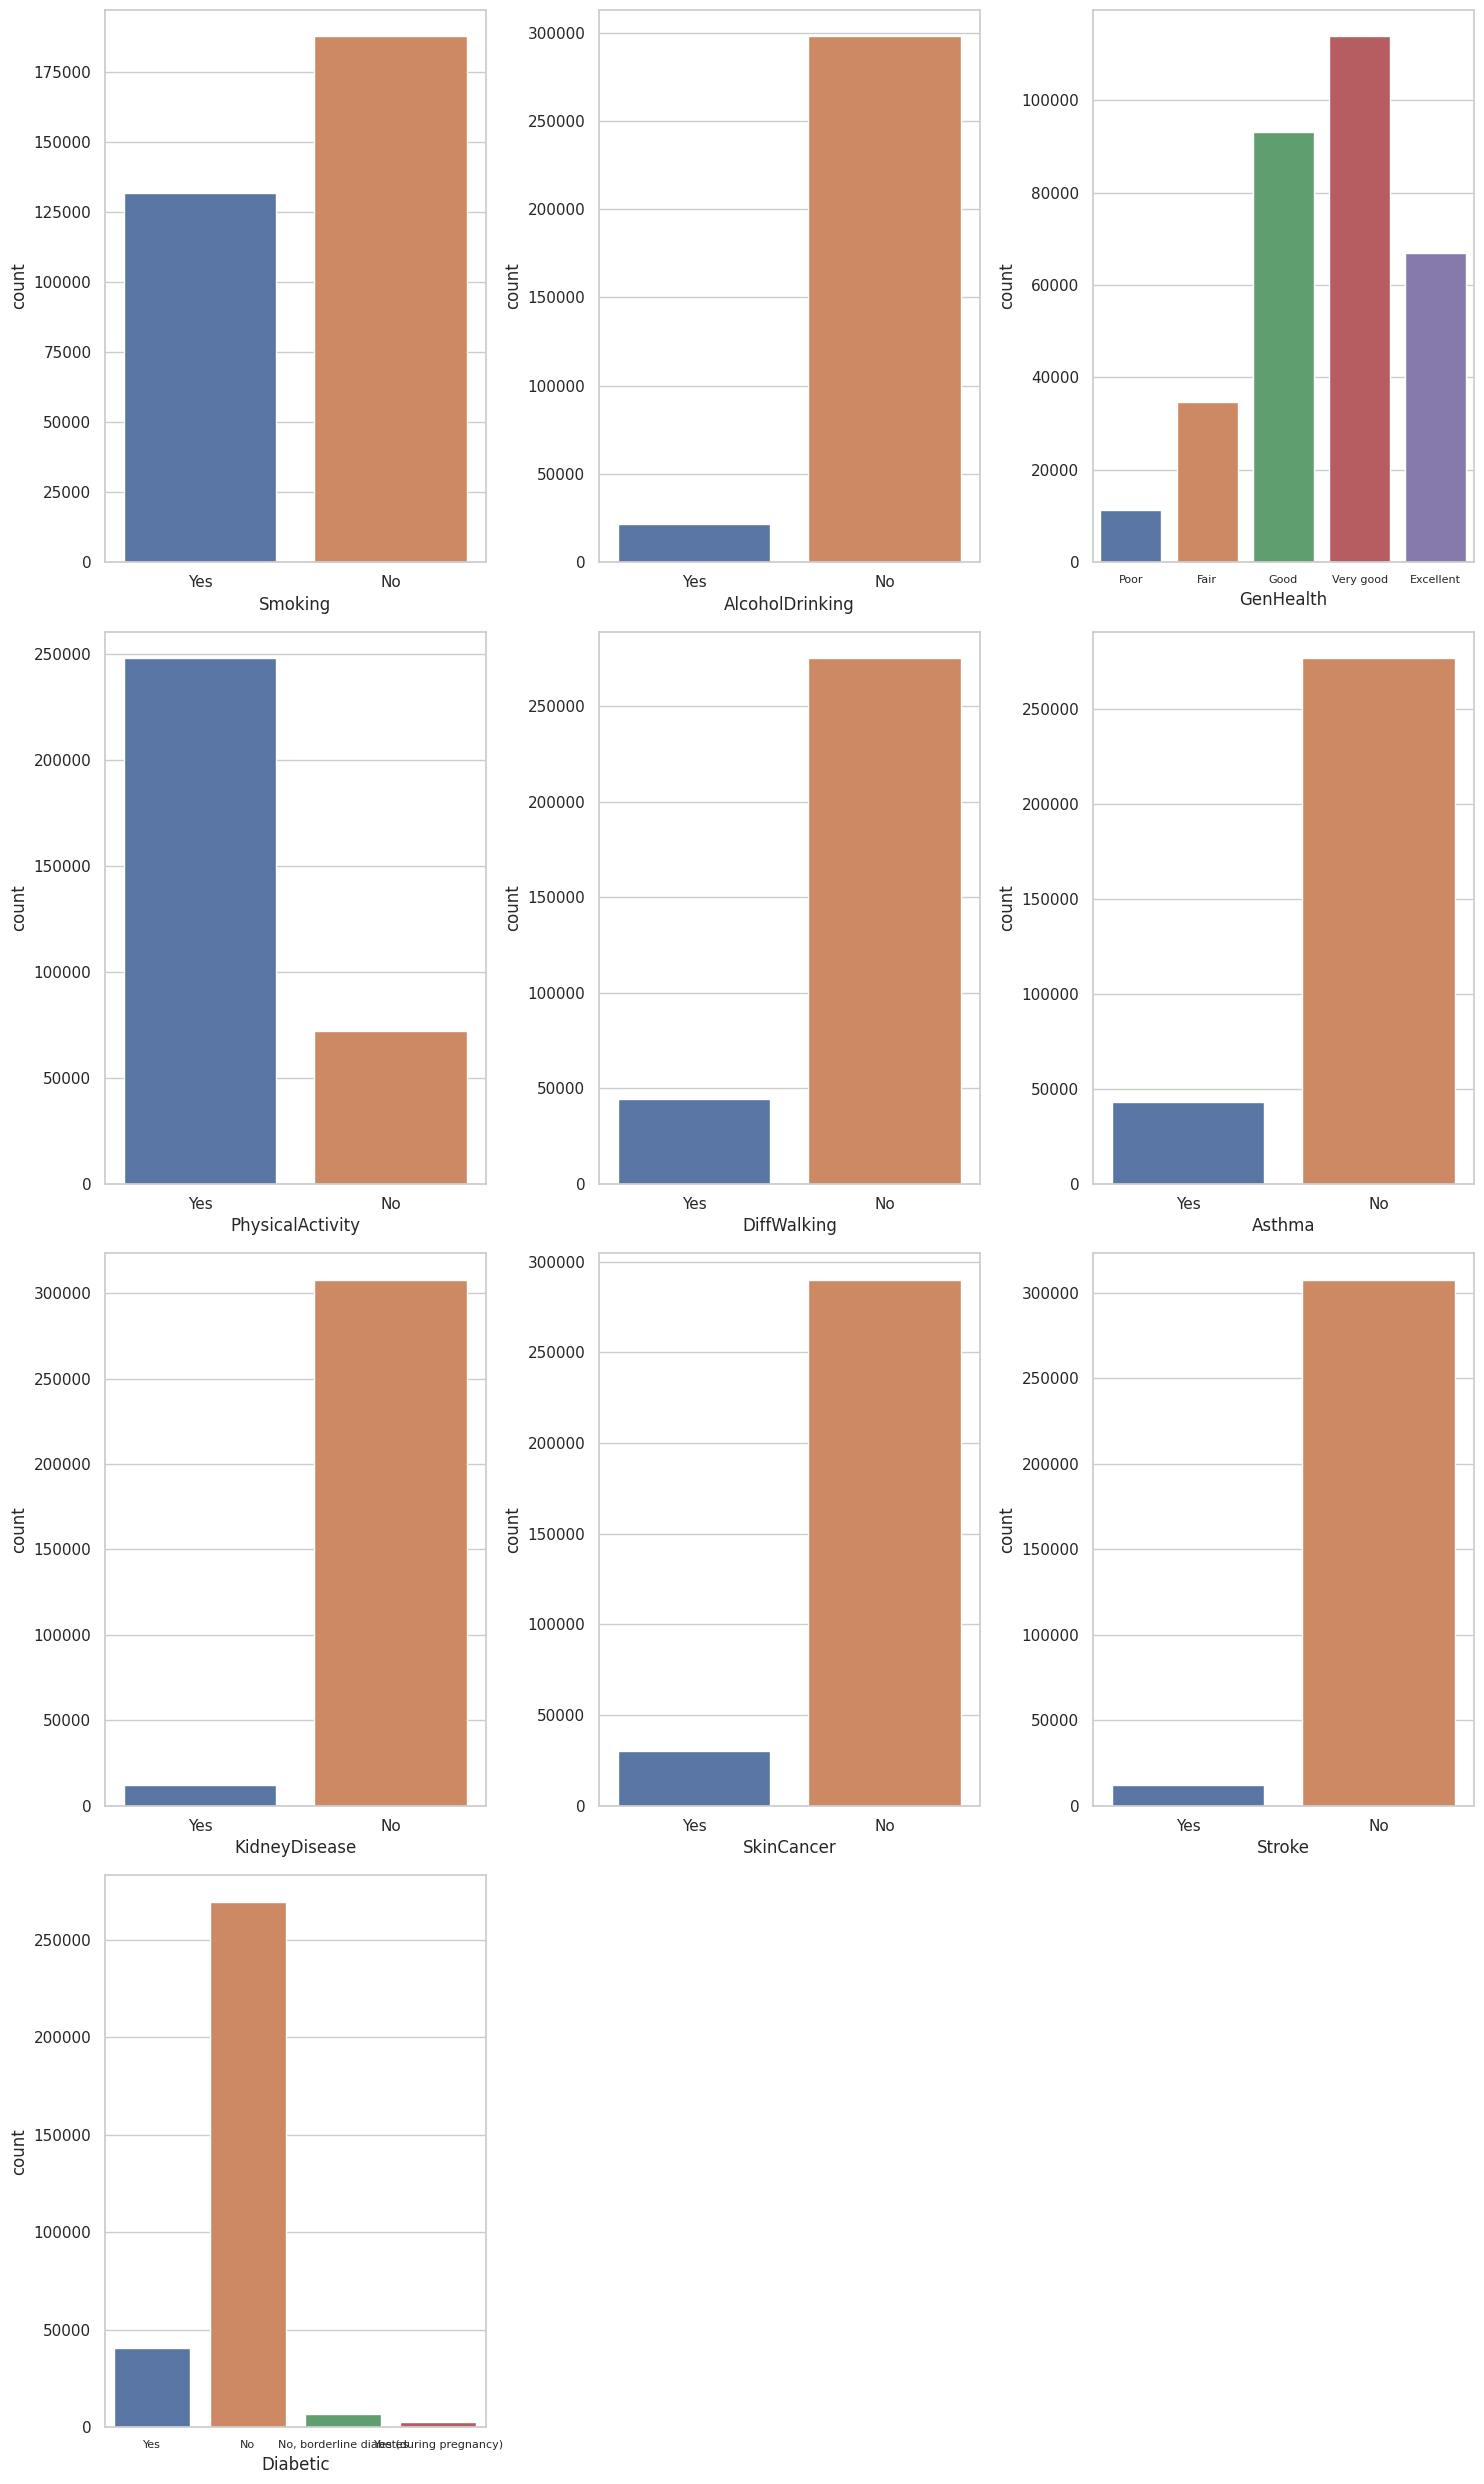

In [17]:
# Plot the remaining categorical variables
# source  https://www.kaggle.com/code/rajeevnair676/svm-hyperparameter-tuning
# countplot is suitable for categorical variables

sns.set(style='whitegrid')
plt.figure(figsize=(15, 25))

# Smoking
# Order responses

Smoking_order=['Yes', 'No']
plt.subplot(4, 3, 1)
sns.countplot(x=df_inspect['Smoking'], data=df_inspect, order=Smoking_order)


# Alcohol
# Order responses
Alcohol_order=['Yes', 'No']

plt.subplot(4, 3, 2)
sns.countplot(x=df_inspect['AlcoholDrinking'], data=df_inspect, order=Alcohol_order)


# General Health
# Order general health ranking
GenHealth_order=['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

plt.subplot(4, 3, 3)
sns.countplot(x=df_inspect['GenHealth'], data=df_inspect, order=GenHealth_order)
plt.xticks(fontsize=8)


# Physical Activity
# Order responses
Physical_order=['Yes', 'No']

plt.subplot(4, 3, 4)
sns.countplot(x=df_inspect['PhysicalActivity'], data=df_inspect, order=Physical_order)



# Difficulty Walking
# Order responses
Walking_order=['Yes', 'No']

plt.subplot(4, 3, 5)
sns.countplot(x=df_inspect['DiffWalking'], data=df_inspect, order=Walking_order)


# Asthma
# Order responses
Asthma_order=['Yes', 'No']

plt.subplot(4, 3, 6)
sns.countplot(x=df_inspect['Asthma'], data=df_inspect, order=Asthma_order)


# Kidney Disease
# Order responses
Kidney_order=['Yes', 'No']

plt.subplot(4, 3, 7)
sns.countplot(x=df_inspect['KidneyDisease'], data=df_inspect, order=Kidney_order)


# Skin Cancer
# Order responses
Skin_order=['Yes', 'No']

plt.subplot(4, 3, 8)
sns.countplot(x=df_inspect['SkinCancer'], data=df_inspect, order=Skin_order)


# Stroke
# Order responses
Stroke_order=['Yes', 'No']

plt.subplot(4, 3, 9)
sns.countplot(x=df_inspect['Stroke'], data=df_inspect, order=Stroke_order)


# Diabetic
plt.subplot(4, 3, 10)
sns.countplot(x=df_inspect['Diabetic'], data=df_inspect)
plt.xticks(fontsize=8)


# Adjust the layout of the plots so they do not overlap
plt.tight_layout()
plt.show()

## Numerical variables

In [18]:
# Get descriptive statistics of numerical variables
df_inspect.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


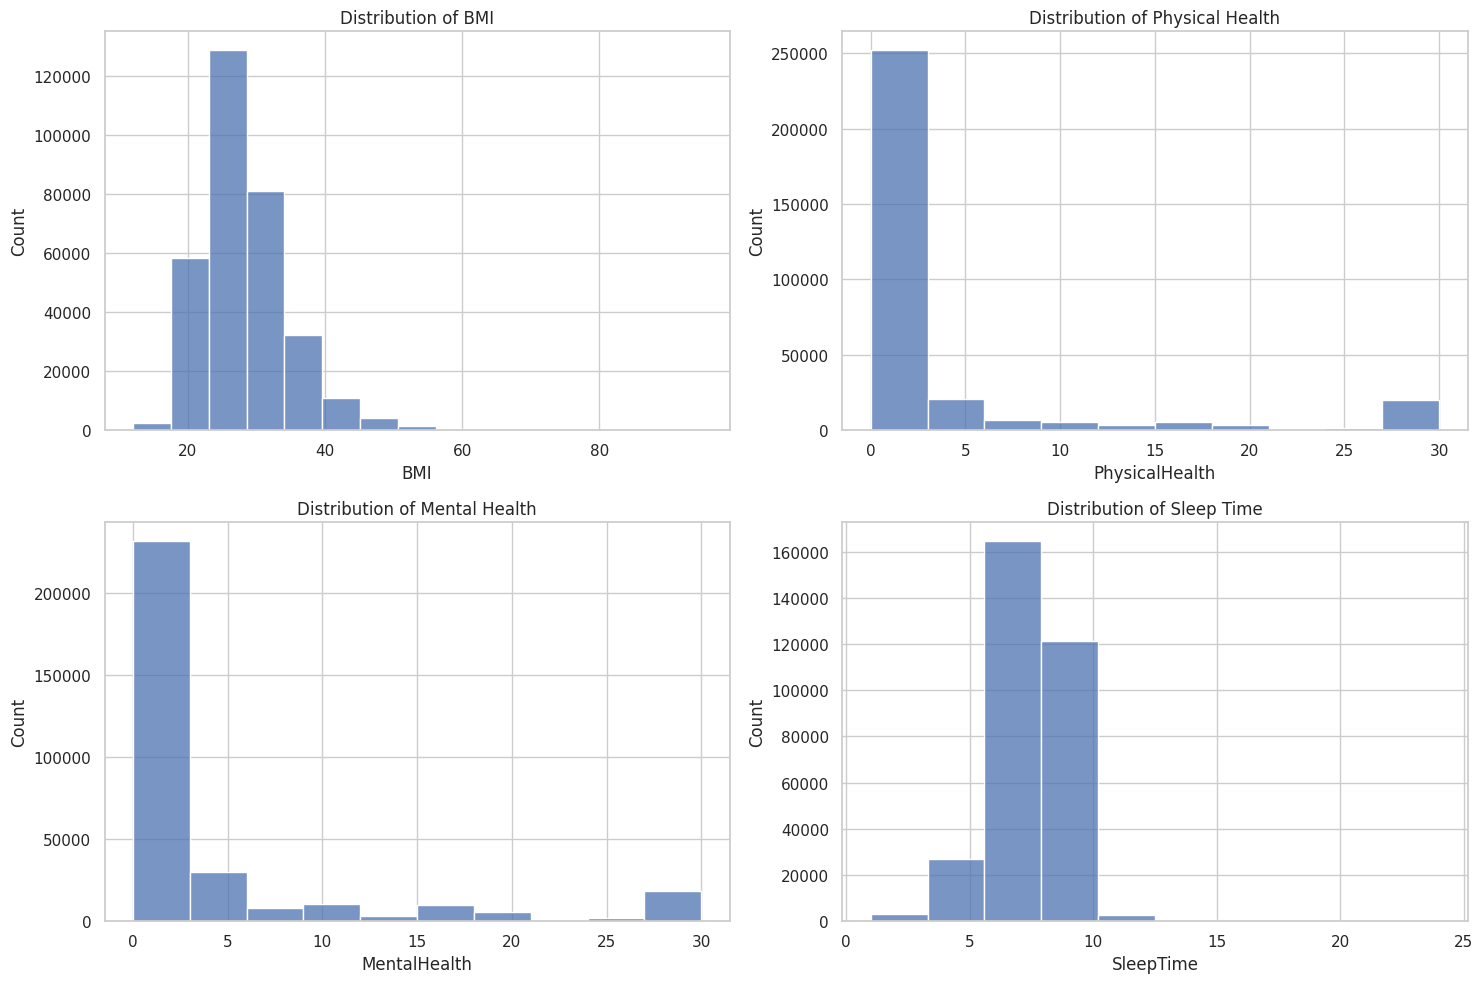

In [19]:
# Inspect the numerical variables
# Setup the style and figure size
# histplot is suitable for numerical variables

sns.set(style='whitegrid')
plt.figure(figsize=(15, 10))

# BMI
plt.subplot(2, 2, 1)
sns.histplot(df_inspect['BMI'], kde=False, bins=15)
plt.title('Distribution of BMI')

# PhysicalHealth
plt.subplot(2, 2, 2)
sns.histplot(df_inspect['PhysicalHealth'], kde=False, bins=10)
plt.title('Distribution of Physical Health')

# MentalHealth
plt.subplot(2, 2, 3)
sns.histplot(df_inspect['MentalHealth'], kde=False, bins=10)
plt.title('Distribution of Mental Health')

# SleepTime
plt.subplot(2, 2, 4)
sns.histplot(df_inspect['SleepTime'], kde=False, bins=10)
plt.title('Distribution of Sleep Time')

# Adjust layout to ensure no overlapping
plt.tight_layout()
plt.show()


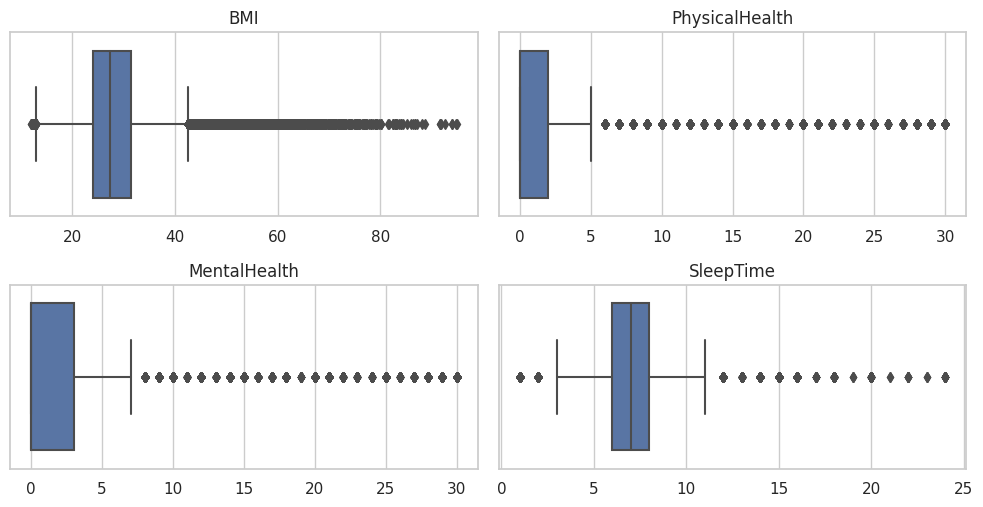

In [20]:
# Check for outliers
# Define the numerical_variables list
numerical_variables = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


# Set up the figure and axes
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")

# Loop through each numerical column and create a box plot for each variable
for i, col in enumerate(numerical_variables, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df_inspect[col])
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [21]:
# Remove target variable
categorical_variables.remove('HeartDisease')

categorical_variables

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

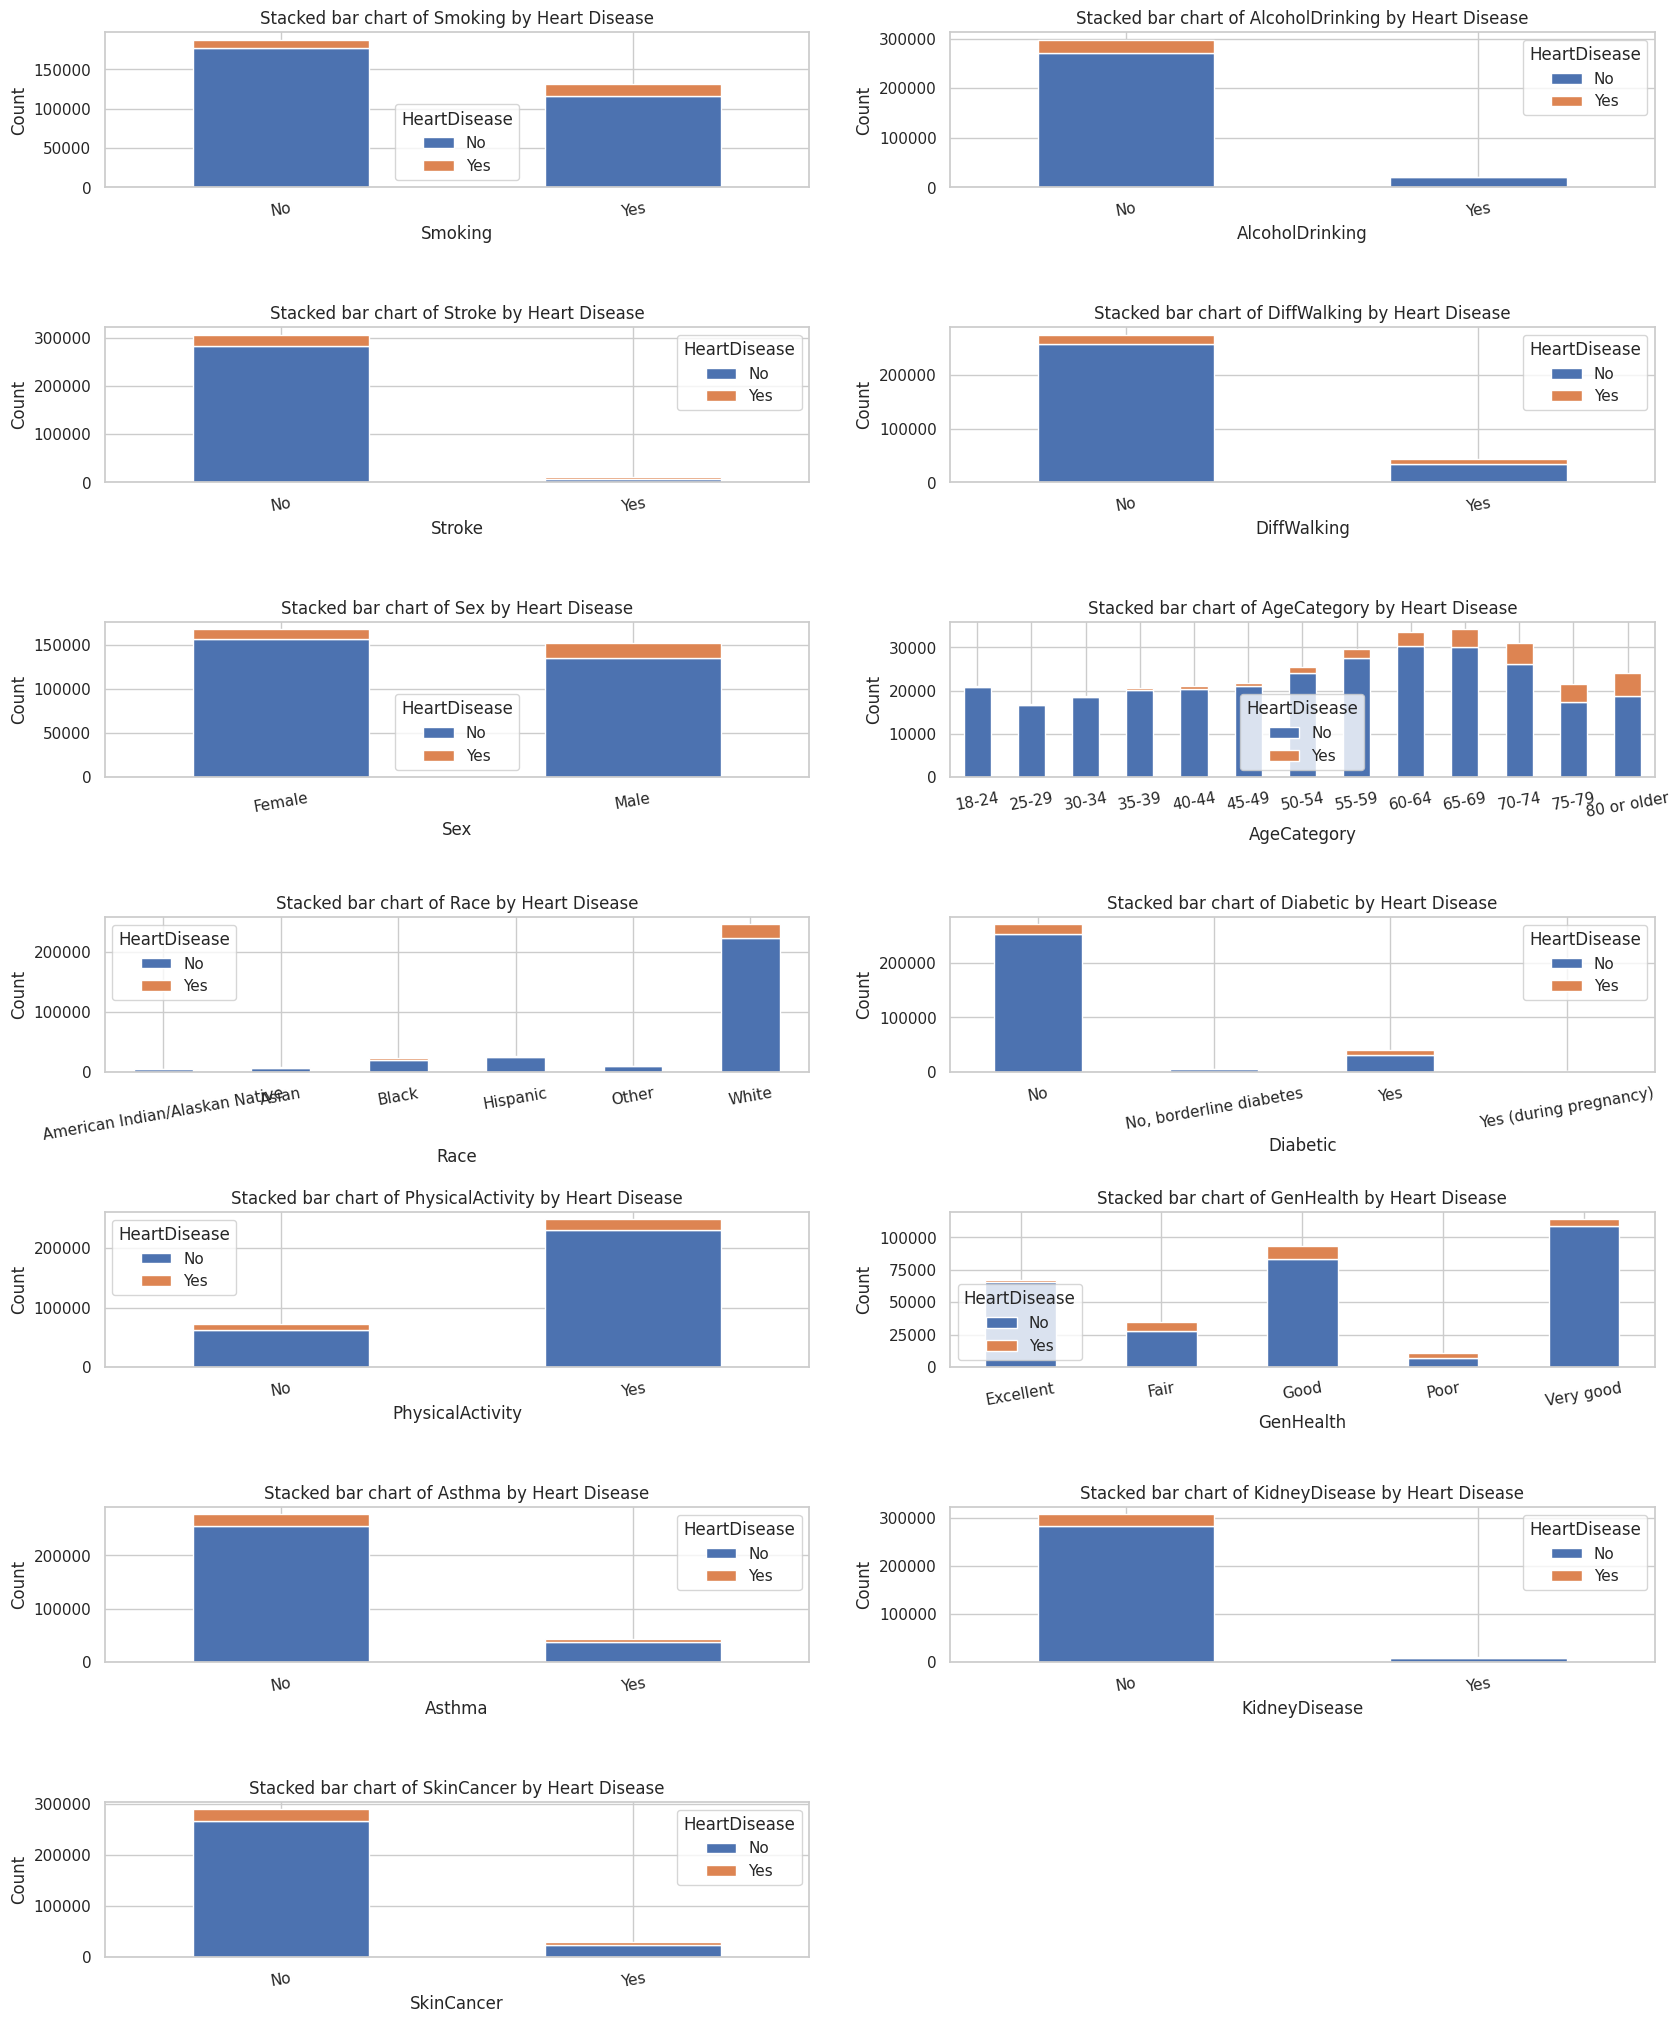

In [22]:
# Set up the matplotlib figure
# Adjust the vertical space between the stacked bar charts
plt.figure(figsize=(20, 25))

# Plot stacked bar charts for each categorical variable against target variable, heart disease
# the x-axis labels are rotated and more vertical space added to improve legibility
for i, col in enumerate(categorical_variables, 1):
    plt.subplot(7, 2, i)

    # Count the occurrences of each category grouped by target variable, heart disease
    grouped_data = df_inspect.groupby(['HeartDisease', col]).size().unstack(level=0)

    # Plot the stacked bar chart
    grouped_data.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f"Stacked bar chart of {col} by Heart Disease")
    plt.ylabel('Count')
    plt.xticks(rotation=10)  # Rotate x-axis labels to 10 degrees

# Adjust vertical space
plt.subplots_adjust(hspace=0.9)

plt.show()

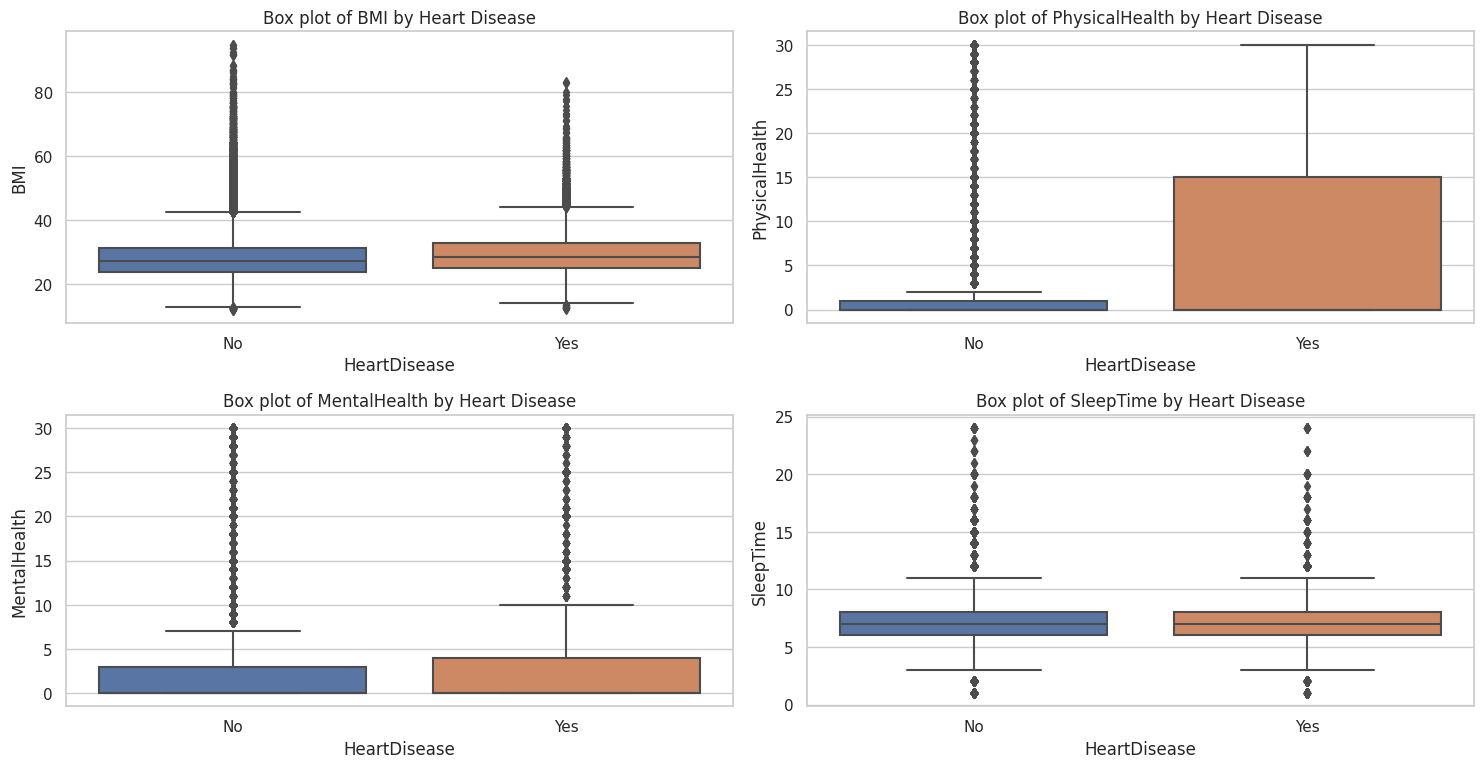

In [23]:
# Box Plots

# Set up the matplotlib figure
plt.figure(figsize=(15, 15))

# Plot boxplots for each numerical variable against heart disease
for i, col in enumerate(numerical_variables, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df_inspect['HeartDisease'], y=df_inspect[col])
    plt.title(f"Box plot of {col} by Heart Disease")
    plt.tight_layout()

plt.show()

## Further examination of respondents who report having heart disease

In [24]:
# Filter the dataset for respondents who reported having heart disease
heart_disease_data = df_inspect[df_inspect['HeartDisease'] == 'Yes']

# Display the first few rows of the filtered dataset
heart_disease_data.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


In [25]:
# Descriptive analysis for categorical variables
categorical_summary = heart_disease_data[categorical_variables].apply(lambda x: x.value_counts()).T.stack()

# Descriptive analysis for numerical variables
numerical_variables = ['BMI', 'SleepTime', 'PhysicalHealth', 'MentalHealth']
numerical_summary = heart_disease_data[numerical_variables].describe()

categorical_summary, numerical_summary


(Smoking           No                                11336.0
                   Yes                               16037.0
 AlcoholDrinking   No                                26232.0
                   Yes                                1141.0
 Stroke            No                                22984.0
                   Yes                                4389.0
 DiffWalking       No                                17345.0
                   Yes                               10028.0
 Sex               Female                            11234.0
                   Male                              16139.0
 AgeCategory       18-24                               130.0
                   25-29                               133.0
                   30-34                               226.0
                   35-39                               296.0
                   40-44                               486.0
                   45-49                               744.0
                   50-54

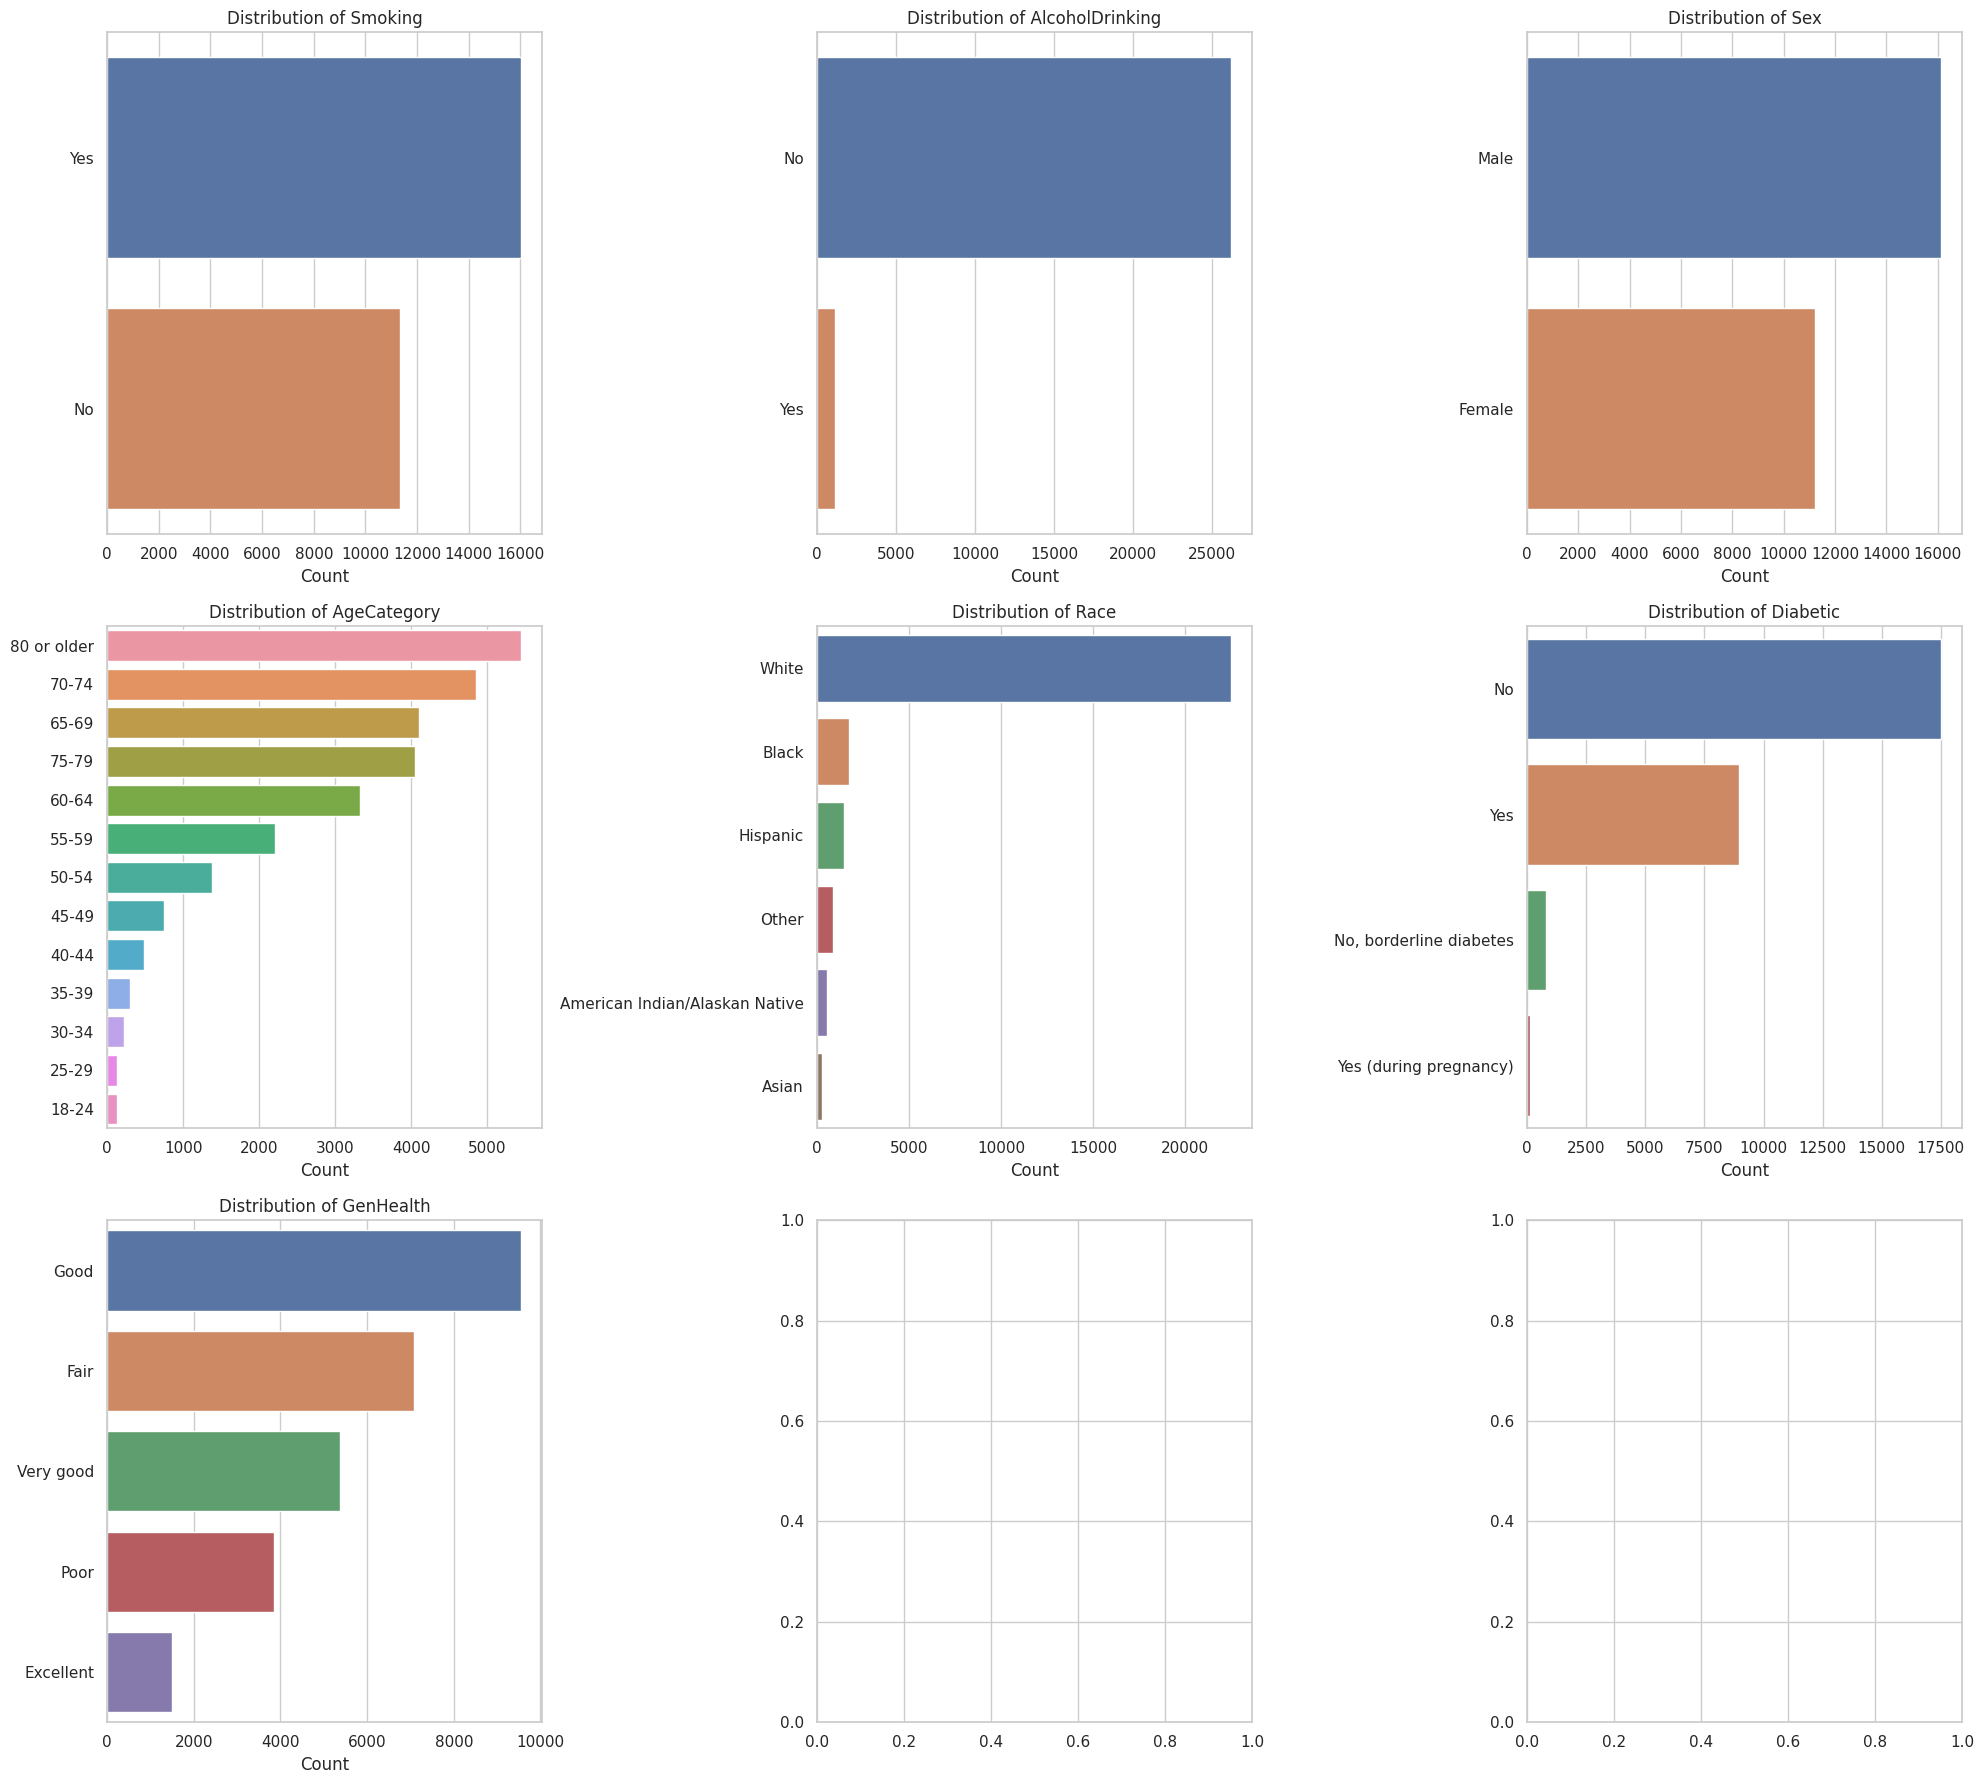

In [26]:
# Visualize categorical variables
# Set up the figure and axes for a 3x3 grid of plots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 18))

# List of categorical variables to visualize
variables = ['Smoking', 'AlcoholDrinking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'GenHealth']

# Loop through the variables and create bar plots
for i, var in enumerate(variables):
    sns.countplot(data=heart_disease_data, y=var, order=heart_disease_data[var].value_counts().index, ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(f'Distribution of {var}')
    axs[i//3, i%3].set_xlabel('Count')
    axs[i//3, i%3].set_ylabel('')

# Adjust the layout
plt.tight_layout()
plt.show()


### Descriptive analysis of respondents with heart disease  
**Categorical Variables**:
- **Smoking**: More respondents were smokers (16,037) compared to those who weren't (11,336).
- **Alcohol Drinking**: A large majority of respondents (26,232) reported not drinking alcohol, compared to 1,141 who drink alcohol.
- **Sex**: There are slightly more males than females in this group (16,139 vs 11,234).
- **AgeCategory**: The majority of respondents are older ("65-69", "70-74", "75-79", "80 or older"). This confirms that as age increases, so does the risk of heart disease.
- **Race**: The vast majority of respondents identified as "White" (22,507). All other races had significantly fewer respondents.
- **Diabetic**: 17,519 respondents reported not having diabetes, while 8,957 reported having diabetes. 789 respondents reported borderline diabetes.
- **GenHealth**: "Good" health was reported by 9,558 respondents, followed by "Very good" (5,381) and "Fair" (7,084). Fewer respondents reported their general health as "Excellent" (1,500) or "Poor" (3,850).



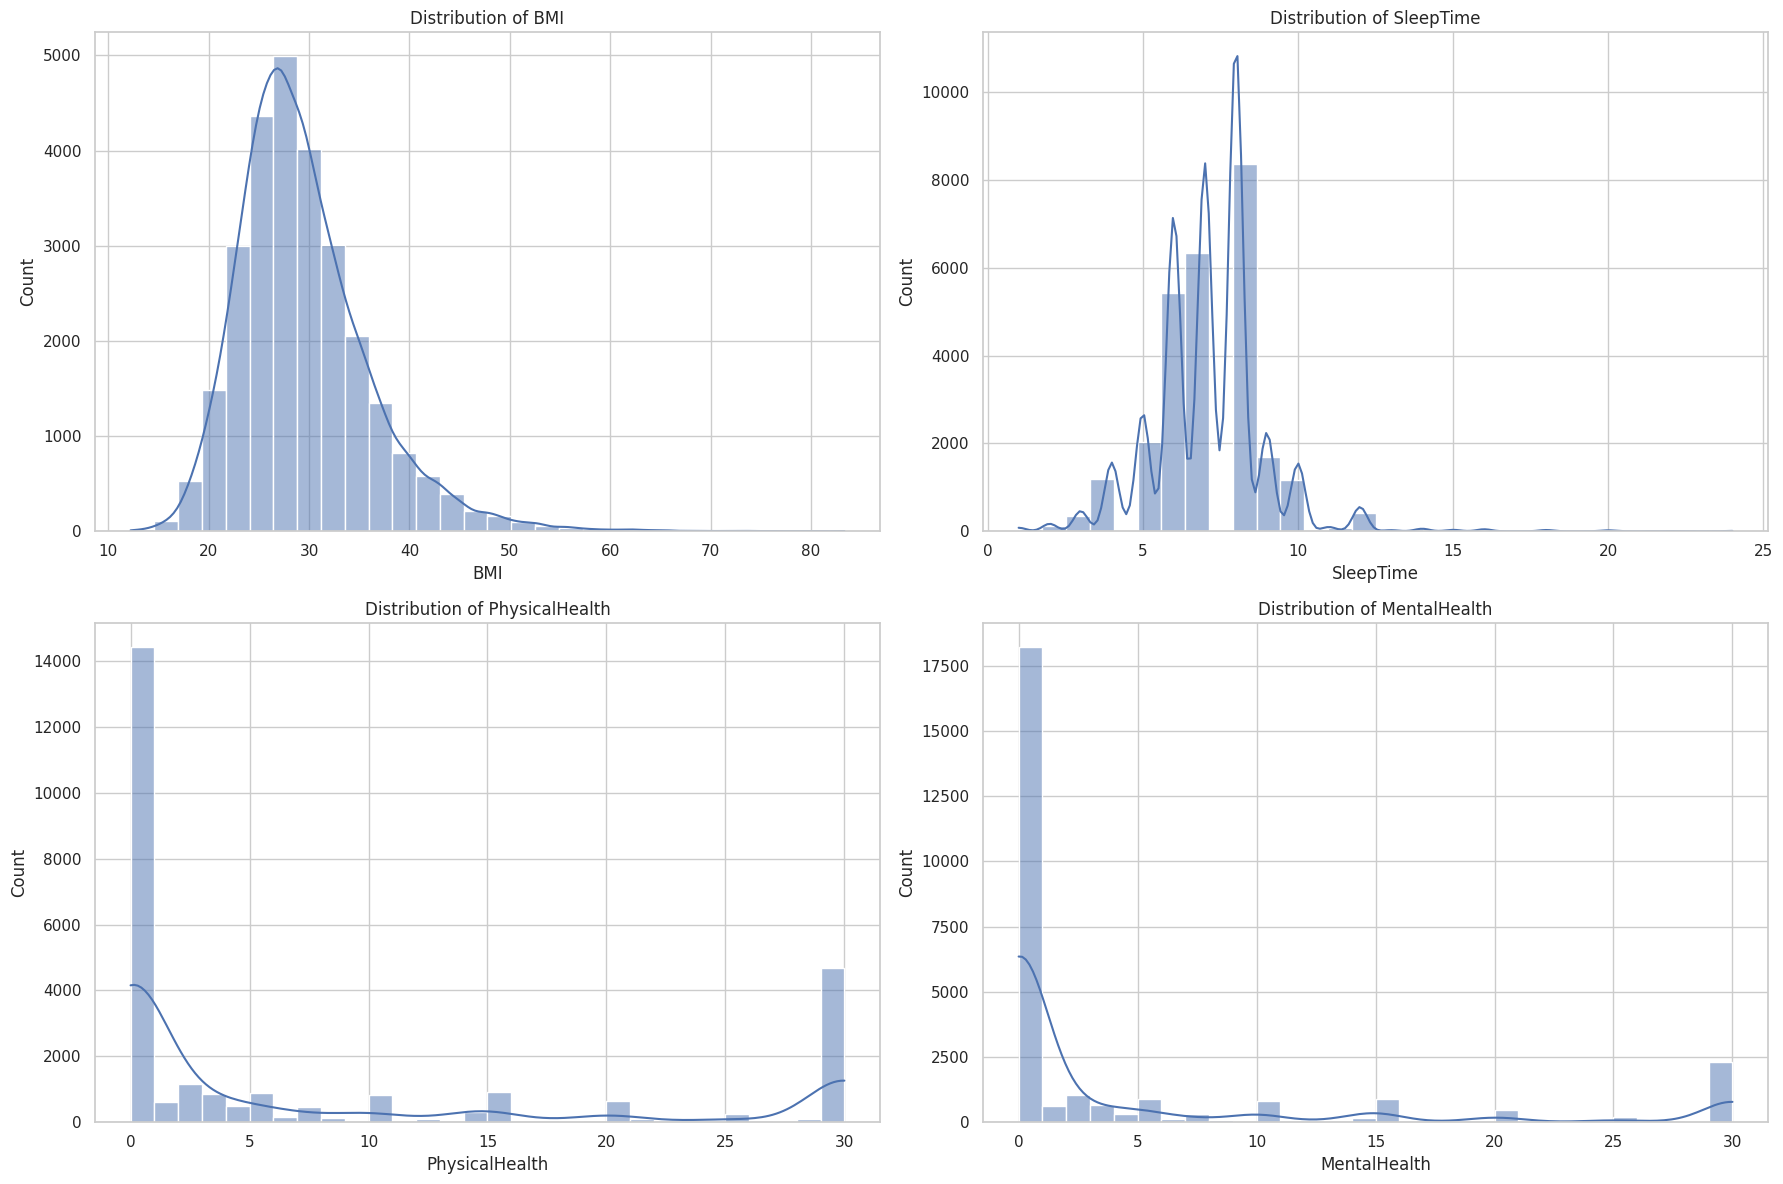

In [27]:
# Visualize the numerical variables
# Set up the figure and axes for a 2x2 grid of plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# List of numerical variables to visualize
numerical_vars = ['BMI', 'SleepTime', 'PhysicalHealth', 'MentalHealth']

# Loop through the variables and create histograms
for i, var in enumerate(numerical_vars):
    sns.histplot(heart_disease_data[var], bins=30, ax=axs[i//2, i%2], kde=True)
    axs[i//2, i%2].set_title(f'Distribution of {var}')
    axs[i//2, i%2].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()


### Numerical variables  
- **BMI**: The BMI ranges between 12.21 and 83.33, with an average BMI of 29.40, and standard deviation about 6.58.
- **SleepTime**: Average hours of sleep per day is 7.14. The sleep duration varies between 1 to 24 hours.
- **PhysicalHealth**: On average, respondents reported feeling physically unhealthy for about 7.81 days in the past 30 days.
- **MentalHealth**: On average, respondents reported feeling mentally unhealthy for about 4.64 days in the past 30 days.


## Health Education Opportunity  
##### The numerical and categorical variables listed above describe the demographic and behavioral characteristics of people who might benefit from a heart health awareness campaign, namely older, white males who smoke and who report feeling physically and mentally unhealthy in the last month.    
#####  Most respondents reported that their health is "Good" or "Fair". However, this was not an accurate indicator of the presence of heart disease. Thus, regular heart health checks are recommended for all, even if they are feeling fine.


## Skin Cancer and Heart Disease Link  
#### Is there a higher prevalence of heart disease in respondents who have reported having skin cancer?

In [28]:
# Check the distribution of 'HeartDisease' and 'SkinCancer' columns
heart_disease_distribution = df_inspect['HeartDisease'].value_counts()
skin_cancer_distribution = df_inspect['SkinCancer'].value_counts()

heart_disease_distribution, skin_cancer_distribution


(No     292422
 Yes     27373
 Name: HeartDisease, dtype: int64,
 No     289976
 Yes     29819
 Name: SkinCancer, dtype: int64)

In [29]:
# Group the data by 'SkinCancer' and calculate the proportion of respondents with heart disease in each group
heart_disease_by_skin_cancer = df_inspect.groupby('SkinCancer')['HeartDisease'].value_counts(normalize=True).unstack().fillna(0)
heart_disease_by_skin_cancer['Proportion_With_HeartDisease'] = heart_disease_by_skin_cancer['Yes']

heart_disease_by_skin_cancer[['Proportion_With_HeartDisease']]


HeartDisease,Proportion_With_HeartDisease
SkinCancer,
No,0.077224
Yes,0.167008


__Respondents with no skin cancer__  
- 7.7% of these respondents said they had heart disease.  

__Respondents with skin cancer__
- 16.7% respondents in this group said they had heart disease.  

To compare the two categorical variables, 'HeartDisease' and 'SkinCancer', we can use the Chi-squared test.

In [30]:
# Perform the chi-squared test
from scipy.stats import chi2_contingency

# Create a contingency table for 'HeartDisease' and 'SkinCancer'
contingency_table = df_inspect.groupby('SkinCancer')['HeartDisease'].value_counts().unstack().fillna(0)

# Perform the Chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

chi2, p


(2783.640539757866, 0.0)

Based on the results of the Chi-squared test:

- The Chi-squared statistic is = 2783.64.
- The p-value is p = 0.0.  

As the p-value is zero, we can reject the null hypothesis that having skin cancer and having heart cancer are independent. Thus, there could be a statistically significant link between having skin cancer and heart disease among the respondents who were surveyed for the dataset.


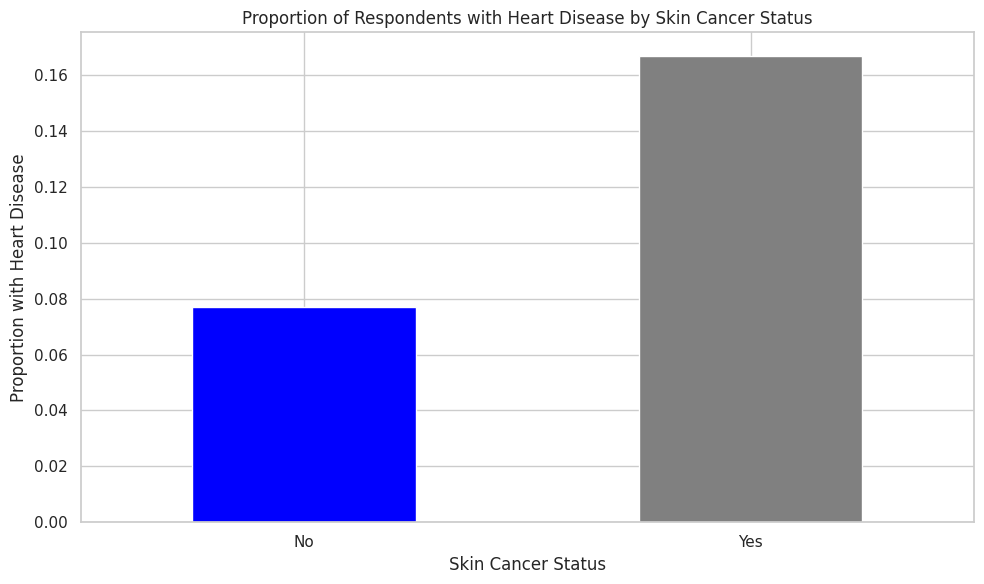

In [31]:
# Plot the proportions
plt.figure(figsize=(10, 6))
heart_disease_by_skin_cancer['Proportion_With_HeartDisease'].plot(kind='bar', color=['blue', 'grey'])
plt.title('Proportion of Respondents with Heart Disease by Skin Cancer Status')
plt.ylabel('Proportion with Heart Disease')
plt.xlabel('Skin Cancer Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Co-existing Health Condition - Diabetes

In [32]:
# Group the data by 'Diabetic' and calculate the proportion of respondents with heart disease in each group
heart_disease_by_diabetic = df_inspect.groupby('Diabetic')['HeartDisease'].value_counts(normalize=True).unstack().fillna(0)
heart_disease_by_diabetic['Proportion_With_HeartDisease'] = heart_disease_by_diabetic['Yes']

heart_disease_by_diabetic[['Proportion_With_HeartDisease']]


HeartDisease,Proportion_With_HeartDisease
Diabetic,
No,0.064969
"No, borderline diabetes",0.116355
Yes,0.219524
Yes (during pregnancy),0.042204


**Respondents who reported not being diabetic**:
  - 6.50% reported having heart disease.
  
**Respondents who reported having borderline diabetes**:
  - 11.64% reported having heart disease.

**Respondents who reported being diabetic**:
  - 21.95% reported having heart disease.
  
**Respondents who reported having diabetes only during pregnancy**:
  - 4.22% reported having heart disease.


In [33]:
# Create a contingency table for 'HeartDisease' and 'Diabetic'
contingency_table_diabetic = df_inspect.groupby('Diabetic')['HeartDisease'].value_counts().unstack().fillna(0)

# Perform the Chi-squared test
chi2_diabetic, p_diabetic, _, _ = chi2_contingency(contingency_table_diabetic)

chi2_diabetic, p_diabetic


(10959.86127652373, 0.0)

The results of the Chi-squared test for the relationship between diabetic status and heart disease are:

- The Chi-squared statistic = 10959.86.
- The p-value is p = 0.0.

As the p-value is zero, we can reject the null hypothesis that being diabetic and having heart disease are independent. Thus, there could be a statistically significant link between having diabetes and heart disease among respondents in the dataset.


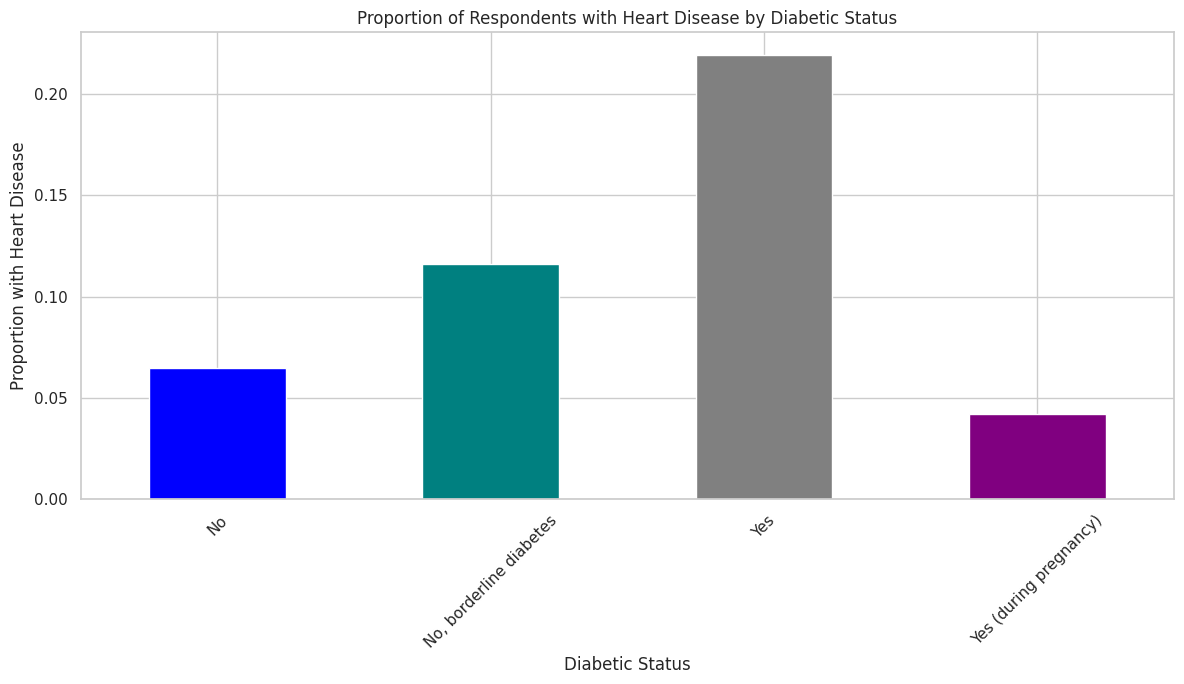

In [34]:
# Plotting the proportions for diabetic status
plt.figure(figsize=(12, 7))
heart_disease_by_diabetic['Proportion_With_HeartDisease'].plot(kind='bar', color=['blue', 'teal', 'grey', 'purple'])
plt.title('Proportion of Respondents with Heart Disease by Diabetic Status')
plt.ylabel('Proportion with Heart Disease')
plt.xlabel('Diabetic Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Co-existing Health Condition - Stroke

In [35]:
# Group the data by 'Stroke' and calculate the proportion of respondents with heart disease in each group
heart_disease_by_stroke = df_inspect.groupby('Stroke')['HeartDisease'].value_counts(normalize=True).unstack().fillna(0)
heart_disease_by_stroke['Proportion_With_HeartDisease'] = heart_disease_by_stroke['Yes']

heart_disease_by_stroke[['Proportion_With_HeartDisease']]


HeartDisease,Proportion_With_HeartDisease
Stroke,
No,0.074690
Yes,0.363659


**Respondents who reported not having a stoke**:
  - 7.46% reported having heart disease.
  
**Respondents who reported having a stroke**:
  - 36.36% reported having heart disease.



In [36]:
# Create a contingency table for 'HeartDisease' and 'Stroke'
contingency_table_stroke = df_inspect.groupby('Stroke')['HeartDisease'].value_counts().unstack().fillna(0)

# Perform the Chi-squared test
chi2_stroke, p_stroke, _, _ = chi2_contingency(contingency_table_stroke)

chi2_stroke, p_stroke


(12386.4888802668, 0.0)

Results of the Chi-squared test for the relationship between having a stroke and heart disease are:

- The Chi-squared statistic = 12386.49.
- The p-value is p = 0.0.

As the p-value is zero, we can reject the null hypothesis that suffering from a stroke and having heart disease are independent. Thus, there could be a statistically significant link between strokes and heart disease among respondents in the dataset.


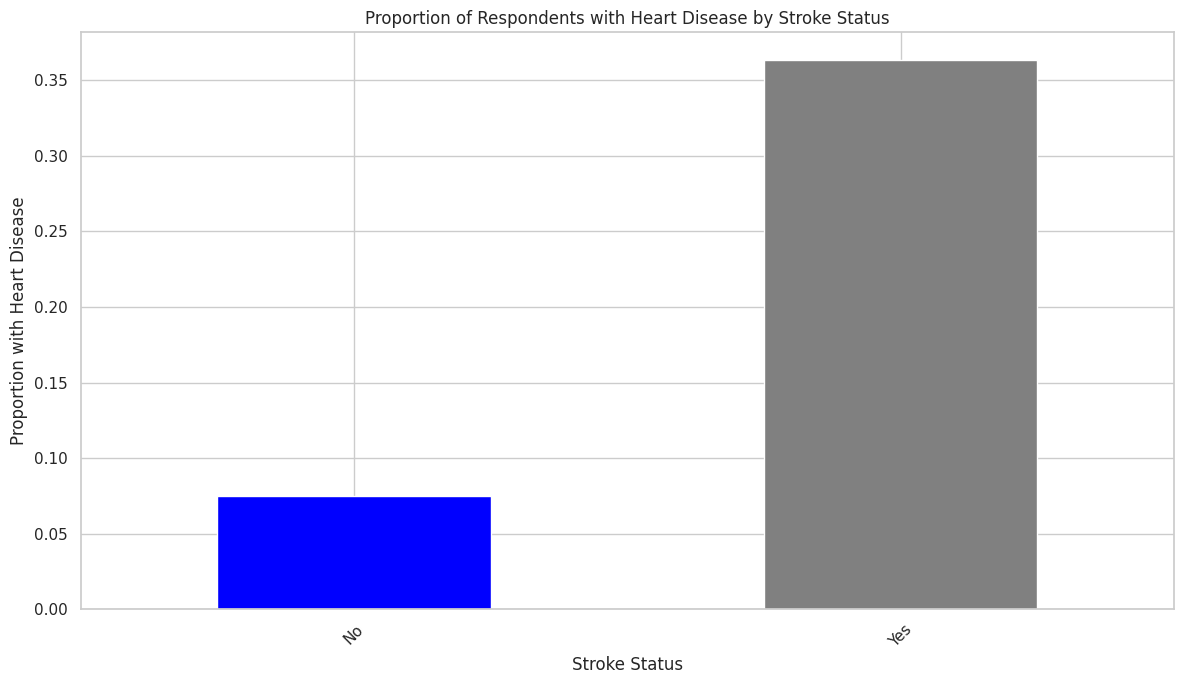

In [37]:
# Plotting the proportions for respondents reporting strokes
plt.figure(figsize=(12, 7))
heart_disease_by_stroke['Proportion_With_HeartDisease'].plot(kind='bar', color=['blue', 'grey'])
plt.title('Proportion of Respondents with Heart Disease by Stroke Status')
plt.ylabel('Proportion with Heart Disease')
plt.xlabel('Stroke Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Co-existing Health Condition - Kidney Disease

In [38]:
# Group the data by 'KidneyDisease' and calculate the proportion of respondents with heart disease in each group
heart_disease_by_kidney = df_inspect.groupby('KidneyDisease')['HeartDisease'].value_counts(normalize=True).unstack().fillna(0)
heart_disease_by_kidney['Proportion_With_HeartDisease'] = heart_disease_by_kidney['Yes']

heart_disease_by_kidney[['Proportion_With_HeartDisease']]


HeartDisease,Proportion_With_HeartDisease
KidneyDisease,
No,0.077652
Yes,0.293319


**Respondents who reported not having kidney disease**:
  - 7.76% reported having heart disease.
  
**Respondents who reported having kidney disease**:
  - 29.33% reported having heart disease.



In [39]:
# Create a contingency table for 'HeartDisease' and 'KidneyDisease'
contingency_table_kidney = df_inspect.groupby('KidneyDisease')['HeartDisease'].value_counts().unstack().fillna(0)

# Perform the Chi-squared test
chi2_kidney, p_kidney, _, _ = chi2_contingency(contingency_table_kidney)

chi2_kidney, p_kidney


(6739.226167871357, 0.0)

Results of the Chi-squared test for the relationship between having a stroke and heart disease are:

- The Chi-squared statistic = 6739.23.
- The p-value is p = 0.0.

As the p-value is zero, we can reject the null hypothesis that suffering from kidney disease and having heart disease are independent. Thus, there could be a statistically significant link between kidney disease and heart disease among respondents in the dataset.


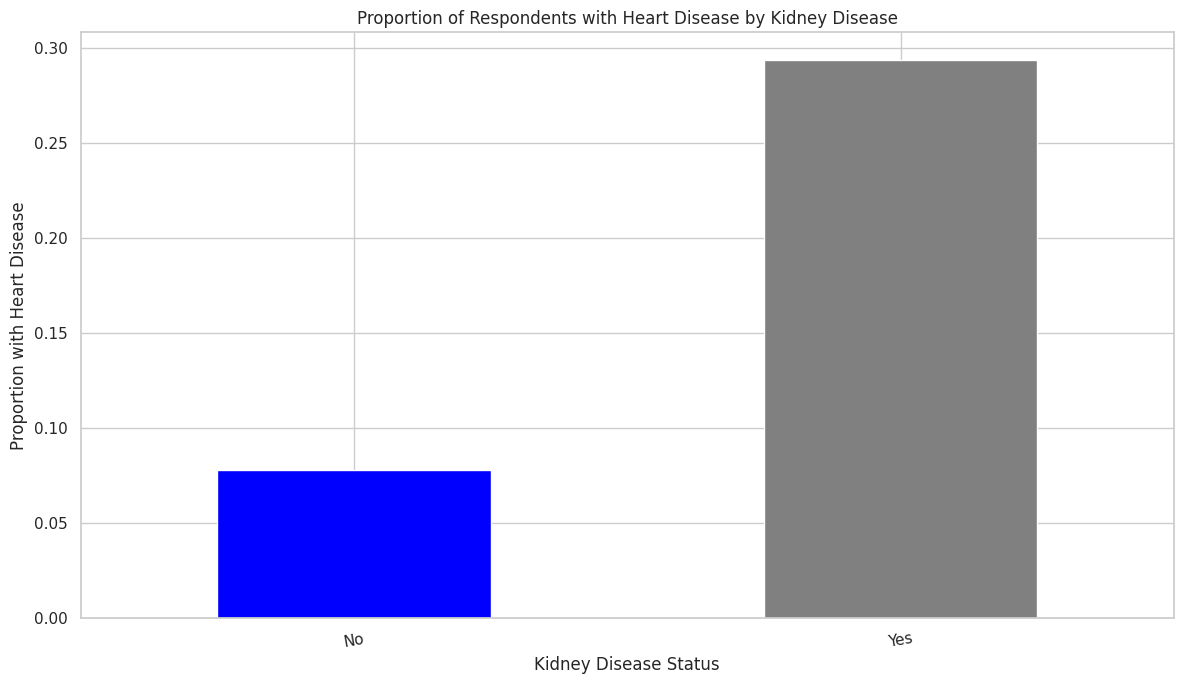

In [40]:
# Plotting the proportions for respondents reporting kidney disease
plt.figure(figsize=(12, 7))
heart_disease_by_kidney['Proportion_With_HeartDisease'].plot(kind='bar', color=['blue', 'grey'])
plt.title('Proportion of Respondents with Heart Disease by Kidney Disease')
plt.ylabel('Proportion with Heart Disease')
plt.xlabel('Kidney Disease Status')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


# Preparation for Modeling Stage

### Simplify variables
Prior to modeling, the values in 'Diabetic' can be simplified, so that all its values fall into the 'No' or 'Yes' category similar to the categorical variables such as 'KidneyDisease'.

In [41]:
# Simplify the values in 'Diabetic' by recategorizing'Yes (during pregnancy)' and 'No, borderline diabetes'.
#'Yes (during pregnancy)' will be recategorized as 'Yes'.
# 'No, borderline diabetes' will be also recategorized as 'No' as the respondent's status has not yet progressed to diabetic status.

df_inspect['Diabetic'] = df_inspect['Diabetic'].replace({'Yes (during pregnancy)': 'Yes', 'No, borderline diabetes': 'No'})


In [42]:
# Confirm that 'Diabetic' has been successfully recategorized
df_inspect['Diabetic'].unique()

array(['Yes', 'No'], dtype=object)

## Preprocessing the data

The following preprocessing steps are undertaken to prepare for the modeling stage. We will then use a logistic regression model to predict the risk of heart disease based on the risk factors listed in the dataset.  
- Split the dataset into train, validate and test sets to train and evaluate the model.
- Encode categorical variables into a format that can be used by machine learning models.
- Scale numerical variables to bring them to the same scale.
- Address class imbalance by calculating the class weights that can be used during model training.
  



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

def split_data(X, y, test_size=0.2, val_size=0.25, random_state=42):
    # Split data first to avoid data leakage to the test and validate sets
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size, random_state=random_state, stratify=y_temp)
    return X_train, X_val, X_test, y_train, y_val, y_test

def get_column_types(X):
    categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
    numerical_columns = X.select_dtypes(exclude=['object']).columns.tolist()
    return categorical_columns, numerical_columns

def encode_and_scale_data(X_train, X_val, X_test, categorical_columns, numerical_columns):
    # One-hot encoding
    X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
    X_val_encoded = pd.get_dummies(X_val, columns=categorical_columns, drop_first=True)
    X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

    # Ensure columns in all sets are the same
    common_columns = set(X_train_encoded.columns) & set(X_val_encoded.columns) & set(X_test_encoded.columns)
    X_train_encoded, X_val_encoded, X_test_encoded = X_train_encoded[common_columns], X_val_encoded[common_columns], X_test_encoded[common_columns]

    # Initialize and fit the scaler on the training data
    scaler = StandardScaler()
    X_train_encoded[numerical_columns] = scaler.fit_transform(X_train_encoded[numerical_columns])
    X_val_encoded[numerical_columns] = scaler.transform(X_val_encoded[numerical_columns])
    X_test_encoded[numerical_columns] = scaler.transform(X_test_encoded[numerical_columns])

    return X_train_encoded, X_val_encoded, X_test_encoded

def calculate_class_weights(y):
    return dict(zip([0, 1], [1 / count for count in Counter(y).values()]))

# Ensuring target variable is consistently encoded before splitting
y = df_inspect['HeartDisease'].map({'Yes': 1, 'No': 0})
X = df_inspect.drop('HeartDisease', axis=1)

X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

categorical_columns, numerical_columns = get_column_types(X)

X_train_encoded, X_val_encoded, X_test_encoded = encode_and_scale_data(X_train, X_val, X_test, categorical_columns, numerical_columns)

class_weights = calculate_class_weights(y_train)

# Checking the transformed data and splits
(X_train_encoded.head(), X_train.shape, X_val.shape, X_test.shape, class_weights)


(        GenHealth_Good  PhysicalActivity_Yes  AgeCategory_70-74  Asthma_Yes  \
 105738               0                     1                  0           0   
 231663               1                     0                  0           0   
 102647               0                     1                  0           0   
 30435                1                     1                  0           0   
 243519               0                     0                  1           0   
 
         Race_Other  Diabetic_Yes  AgeCategory_40-44  AgeCategory_45-49  \
 105738           0             0                  0                  1   
 231663           0             1                  0                  0   
 102647           0             0                  0                  0   
 30435            0             0                  0                  0   
 243519           0             0                  0                  0   
 
         AlcoholDrinking_Yes  AgeCategory_80 or older  ...  DiffWa

## Preprocessing summary

### 1. **Data Splitting**
   - **Function:** `split_data(X, y, test_size=0.2, val_size=0.25, random_state=42)`
   - **Purpose:** To split the dataset into training, validation, and test sets.
   - **Details:**
      - The data (`X`, `y`) is split into temporary data (`X_temp`, `y_temp`) and test data (`X_test`, `y_test`) using a stratified split.
      - A stratified split is used to ensure that the distribution of the target variable (y) is the same in both the training and test datasets. This is advisable as the target variable, 'HeartDisease', is imbalanced. With a simple random split, it's possible to end up with a training set that has too few instances of the minority class.
      - The temporary data is further split into training (`X_train`, `y_train`) and validation (`X_val`, `y_val`) sets.
   - **Output:** Six datasets: `X_train`, `X_val`, `X_test`, `y_train`, `y_val`, `y_test`.

### 2. **Type Identification**
   - **Function:** `get_column_types(X)`
   - **Purpose:** To identify and separate numerical and categorical column names.
   - **Details:**
      - Categorical columns are identified by selecting those of type 'object'.
      - Numerical columns are identified by selecting those not of type 'object'.
   - **Output:** Two lists: `categorical_columns` and `numerical_columns`.

### 3. **Data Encoding and Scaling**
   - **Function:** `encode_and_scale_data(X_train, X_val, X_test, categorical_columns, numerical_columns)`
   - **Purpose:** To one-hot encode categorical variables and scale numerical variables.
   - **Details:**
      - One-hot encoding is applied to the categorical columns in the training, validation, and test sets.
      - A check is performed to ensure the columns are consistent across all datasets after encoding.
      - The numerical columns are standardized using a `StandardScaler` fitted on the training data.
   - **Output:** Three processed datasets: `X_train_encoded`, `X_val_encoded`, and `X_test_encoded`.

### 4. **Class Weight Calculation**
   - **Function:** `calculate_class_weights(y)`
   - **Purpose:** To calculate class weights based on the training data.
   - **Details:**
      - The function calculates the inverse of the count of each class in the target variable.
   - **Output:** A dictionary (`class_weights`) containing the weights for each class.

### 5. **Execution and Validation**
   - The target variable (`y`) is encoded before data splitting.
   - Functions are called in sequence with the appropriate arguments.
   - The processed datasets and class weights are validated by checking the first few rows of the processed training data and the shapes of the split datasets.

### Notes:
- **Function Encapsulation:** Each step was encapsulated in a function to provide modularity and readability.
- **Ensuring Consistency:** To ensure consistency, the columns of encoded datasets were checked for any mismatches, the  target variable was encoded before splitting, and the scaler was fit only on the training data to avoid data leakage.

This structured approach ensures that the code is modular and each step of the preprocessing is clear and isolated, which is beneficial for debugging and potential future adjustments.


#### The transformed data and its corresponding splits are as follows:

Training data: 191,877 samples, 17 features.  

Validation data: 63,959 samples, 17 features.  

Test data: 63,959 samples, 17 features.  

Class weights are: 0: 5.7e-06, 1: 6.1e-05, where '0' = 'No' and '1' = 'Yes' for the HeartDisease target variable. These weights can be utilized during the modeling stage to account for the class imbalance.

## Next steps - Modeling
1. We will use Logistic Regression to predict the probability of having heart disease. Logistic Regression is a standard method for handling binary classification problem such as this one, where we are looking for a 'No' or 'Yes' response to our heart disease prediction.   
2. Evaluation metrics such as accuracy, precision, recall, F1-score, and AUC-ROC will be used to evaluate the model.
3. We will examine the coefficients to examine the different risk factors' impact on heart disease prediction.
4. We will perform hyperparameter tuning to improve the performance of the model.

# Establish the baseline model

In [44]:
# Import relevant packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# 1. Model Import and Initialization
model = LogisticRegression(class_weight=class_weights, random_state=42)

# 2. Model Training
model.fit(X_train_encoded, y_train)

# 3. Model Evaluation
# Predicting class labels
y_val_pred = model.predict(X_val_encoded)
# Predicting probabilities
y_val_proba = model.predict_proba(X_val_encoded)[:, 1]

# Displaying classification metrics
print("Validation Metrics:")
print("Accuracy: {:.2f}".format(accuracy_score(y_val, y_val_pred)))
print("Precision: {:.2f}".format(precision_score(y_val, y_val_pred)))
print("Recall: {:.2f}".format(recall_score(y_val, y_val_pred)))
print("F1-Score: {:.2f}".format(f1_score(y_val, y_val_pred)))
print("ROC-AUC Score: {:.2f}".format(roc_auc_score(y_val, y_val_proba)))
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))





Validation Metrics:
Accuracy: 0.79
Precision: 0.22
Recall: 0.56
F1-Score: 0.32
ROC-AUC Score: 0.77

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     58485
           1       0.22      0.56      0.32      5474

    accuracy                           0.79     63959
   macro avg       0.59      0.69      0.60     63959
weighted avg       0.89      0.79      0.83     63959



## Baseline Model Evaluation Summary

### 1. **Accuracy**
   - **Value:** 0.79
   - **Observation:** The model is able to correctly predict the class for 79% of the validation data. However, given that the dataset may be imbalanced (as suggested by the use of `class_weights`), accuracy might not be the most reliable metric to evaluate the model's performance.

### 2. **Precision**
   - **Value:** 0.22
   - **Observation:** Of all instances predicted as class 1 (Heart Disease), only 22% are actually class 1. This suggests that the model may be generating a substantial number of false positives.

### 3. **Recall**
   - **Value:** 0.56
   - **Observation:** The model is able to correctly identify 56% of all actual class 1 instances. While this is better than random guessing, there is room for improvement in reducing false negatives.

### 4. **F1-Score**
   - **Value:** 0.32
   - **Observation:** The F1-score provides a balance between precision and recall and is particularly useful for imbalanced datasets. A score of 0.32 indicates that there is considerable room for improvement in the model's ability to accurately predict class 1 instances.

### 5. **ROC-AUC Score**
   - **Value:** 0.77
   - **Observation:** A ROC-AUC score of 0.77 indicates a reasonable ability of the model to discriminate between the positive and negative class, although there’s still space for improvement.

### 6. **Classification Report**
   - **Observation:** The discrepancy in precision between the two classes (0.95 for class 0 and 0.22 for class 1) indicates that the model is performing significantly better at predicting the negative class (0) compared to the positive class (1). This might be attributed to class imbalance and the model’s difficulty in accurately identifying the minority class.

### Observations:

- **Imbalance Impact:** The provided metrics suggest that the model is struggling to accurately predict class 1 instances, which might be the minority class, given that `class_weights` was used.
  
- **Model's Strength:** The model shows a reasonably good ability to distinguish between positive and negative classes (ROC-AUC: 0.77) but is conservative in predicting positives, as evidenced by a precision of 0.22 for class 1.

- **Model's Weakness:** Despite a relatively decent recall, the model is producing a notable number of false positives, which reduces its precision for class 1.

- **Improvement Areas:** Focus might be placed on improving the model’s ability to identify class 1 instances without substantially increasing false positives.

### Next Steps:

- **Feature Importance:** Investigate the importance of different features in prediction to understand what is driving the model's decisions.

- **Hyperparameter Tuning:** Experiment with adjusting model hyperparameters (e.g., regularization strength) to see if model performance can be improved.

- **Alternative Models:** Consider experimenting with alternative modeling approaches that might handle the imbalance better or form more accurate predictive patterns.

This evaluation approach ensures that the model is thoroughly assessed and helps to improve the performance of the model.

## Confusion Matrix

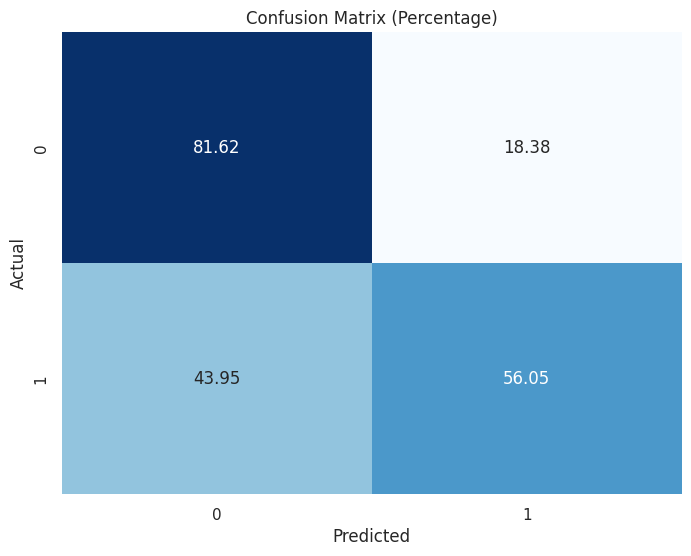

In [45]:
# Visualize the performance of the logistic regression model using a confusion matrix
# Import the confusion_matrix from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Assume y_val and y_val_pred are your actual and predicted values
cm = confusion_matrix(y_val, y_val_pred)

# Convert the confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', cbar=False, annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentage)')
plt.show()


### Confusion Matrix results

- **True Positives (TP):** 56.06%
- **True Negatives (TN):** 81.62%
- **False Positives (FP):** 18.38%
- **False Negatives (FN):** 43.95%


### 1. **True Positives (TP = 56.06%)**
- 56.06% of all actual positive instances were correctly identified by the model as positive. This indicates over half of the actual positives were correctly classified, but there's a substantial portion that was misclassified, which might be concerning depending on the context.

### 2. **True Negatives (TN = 81.62%)**
- 81.62% of all actual negative instances were correctly identified by the model as negative. This is a fairly high percentage, indicating that the model is quite good at identifying true negatives.

### 3. **False Positives (FP = 18.38%)**
- 18.38% of all instances that were actually negative were incorrectly identified as positive. This is relatively high and could be a point of concern depending on the cost or risk associated with false positives in your application.

### 4. **False Negatives (FN = 43.95%)**
- 43.95% of all instances that were actually positive were incorrectly identified as negative. This is quite high and indicates that the model is missing a significant portion of actual positive instances.

### Additional Observations:
- **Precision (Positive Predictive Value):** Precision would be affected by the FP rate, and with 18.38% FP, it indicates that when the model predicts the positive class, it is incorrect a notable amount of the time.
  
- **Recall (Sensitivity):** The FN rate is quite high, meaning the model is missing a significant number of actual positive instances, leading to a lower recall.

- **Specificity:** TN is quite high, which would lead to higher specificity, indicating the model is good at identifying negatives.

We will consider strategies to improve recall, given the serious consequence of not picking up instances of heart disease.



### Feature importance
Feature importance in logistic regression can be determined by examining the coefficients of the model. The magnitude of each coefficient indicates the importance of the feature, and the sign indicates the direction of the relationship (positive/negative).  

We will identify the most important features that have an impact on predicting the risk of heart disease.

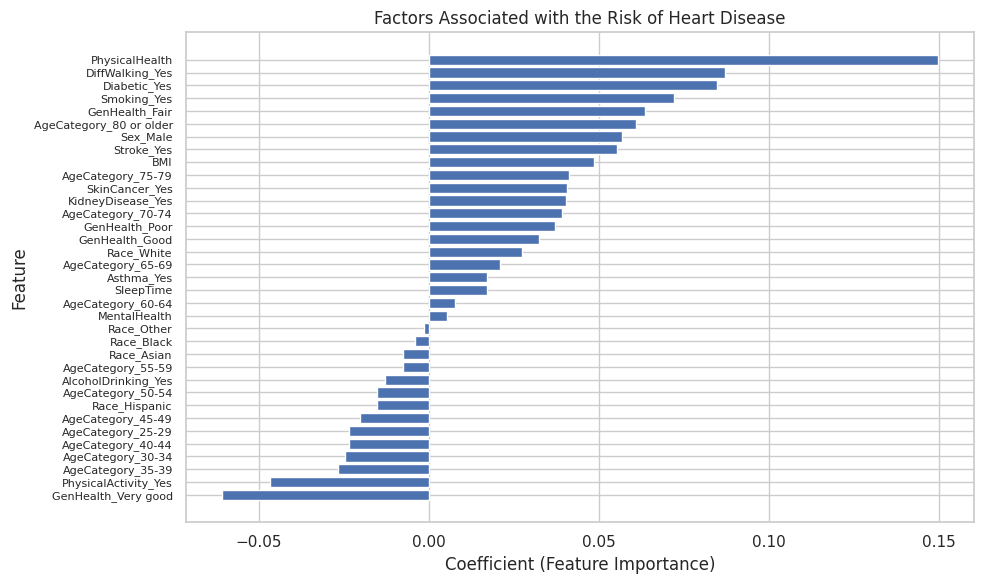

In [46]:
# Get feature importances
importances = model.coef_[0]

# Get feature names
# Ensure X_train_encoded is defined in your session or replace it with preprocessed data
feature_names = X_train_encoded.columns

# Sort feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names[i] for i in indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(X_train_encoded.shape[1]), importances[indices])

# Add feature names as y-axis labels
# Added fontsize parameter here
plt.yticks(range(X_train_encoded.shape[1]), names, fontsize=8)

# Create axis labels
plt.ylabel("Feature")
plt.xlabel("Coefficient (Feature Importance)")

# Create plot title
plt.title("Factors Associated with the Risk of Heart Disease")

# Invert the y-axis to have the most important feature on top
plt.gca().invert_yaxis()

# Show plot
plt.tight_layout()
plt.show()


In [47]:
# List the top 15 features that have an impact on predicting heart disease risk
top_features = names[:15]
top_features

['PhysicalHealth',
 'DiffWalking_Yes',
 'Diabetic_Yes',
 'Smoking_Yes',
 'GenHealth_Fair',
 'AgeCategory_80 or older',
 'Sex_Male',
 'Stroke_Yes',
 'BMI',
 'AgeCategory_75-79',
 'SkinCancer_Yes',
 'KidneyDisease_Yes',
 'AgeCategory_70-74',
 'GenHealth_Poor',
 'GenHealth_Good']

## Hyperparameter tuning

As GridSearchCV and RandomizedSearchCV are computationally intensive, we will perform the search using the most important features that were identified above. By reducing the number of features, we will ease the computational load.


In [48]:
# Import relevant libraries
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression


In [49]:
# Select the top 15 features that have an impact on predicting heart disease risk
# List of top 15 features
top_features = [
    'PhysicalHealth', 'DiffWalking_Yes', 'Diabetic_Yes', 'Smoking_Yes',
    'GenHealth_Fair', 'AgeCategory_80 or older', 'Sex_Male', 'Stroke_Yes',
    'BMI', 'AgeCategory_75-79', 'SkinCancer_Yes', 'KidneyDisease_Yes',
    'AgeCategory_70-74', 'GenHealth_Poor', 'GenHealth_Good'
]

# Create a subset of the data with only the top 15 features
X_train_top_features = X_train_encoded[top_features]


In [50]:
# Initialize a logistic regression model
log_reg = LogisticRegression()

In [51]:
# Define the hyperparameter search space
param_distributions = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}


In [52]:
# Define multiple metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    log_reg,
    param_distributions=param_distributions,
    n_iter=30,  # Number of parameter settings that are sampled
    cv=5,  # 5-fold cross-validation
    scoring=scoring,  # Multiple scoring metrics
    refit='recall',  # Optimize based on recall score
    n_jobs=-1,  # Use all available cores
    random_state=42  # For reproducibility
)

# Perform RandomizedSearchCV on the subset of the data with top features
random_search.fit(X_train_top_features, y_train)

# Retrieve and print the metrics of the best model
cv_results = random_search.cv_results_
for scorer in scoring:
    # Extract the best score for each metric
    best_score = cv_results[f'mean_test_{scorer}'][random_search.best_index_]
    print(f"Best mean {scorer}: {best_score:.2f}")


Best mean accuracy: 0.92
Best mean precision: 0.53
Best mean recall: 0.11
Best mean f1: 0.18
